In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


data_path = 'C:/Users/Usuario/Desktop/data-science/dialogic_accounting_pibic/data'

# Carrega o dataframe
df = pd.read_excel(data_path + '/results/2_independent_variable_4024.xlsx')
df = df.dropna(subset=['IEngajamento'])
df["log_IEngajamento"] = np.log1p(df["IEngajamento"])

In [36]:
variaveis_base = [
    'classify_5_inverted',
    'content_type',
    'posts_per_day',
    'period_of_day',
    'num_hashtags',
    'flesch_index',
    'call_to_action',
    'gov_commented',
    'mean_comment_sentiment'
]

In [37]:
variaveis_independentes = [
    'num_hashtags',
    'content_type',
    'posts_per_day'
]

In [41]:
def rodar_regressao(df, variaveis, label, regiao=False):
    X = df[variaveis].copy()
    if regiao is not False:
        X = df[df['regiao'] == regiao][variaveis].copy()

    X = pd.get_dummies(X, drop_first=True)
    X = sm.add_constant(X).astype(float)
    Y = df["log_IEngajamento"]

    modelo = sm.OLS(Y, X).fit(cov_type="HAC", cov_kwds={"maxlags": 5})
    print(f"\n=== Modelo {label} ===")
    print(modelo.summary())

    print("\n=== VIF (Multicolinearidade) ===")
    vif = pd.DataFrame()
    vif["Variável"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif)
    return modelo

In [42]:
rodar_regressao(df, variaveis_base, label="Geral")


=== Modelo Geral ===
                            OLS Regression Results                            
Dep. Variable:       log_IEngajamento   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     19.14
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           3.64e-47
Time:                        10:16:56   Log-Likelihood:                -4875.9
No. Observations:                3710   AIC:                             9782.
Df Residuals:                    3695   BIC:                             9875.
Df Model:                          14                                         
Covariance Type:                  HAC                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [21]:
df[variaveis_base].columns

Index(['classify_5_inverted', 'content_type', 'posts_per_day', 'period_of_day',
       'num_hashtags', 'flesch_index', 'call_to_action', 'gov_commented',
       'mean_comment_sentiment'],
      dtype='object')

In [ ]:
df[variaveis_base].describe(include='all')

,classify_5_inverted,content_type,posts_per_day,period_of_day,num_hashtags,flesch_index,call_to_action,gov_commented,mean_comment_sentiment
count,3710,3710,3710.000000,3710,3710.000000,3710.000000,3710.00000,3710.000000,3710.000000
unique,5,2,NaN,4,NaN,NaN,NaN,NaN,NaN
top,Nível 2 (Baixo Detalhe Intermediário),Imagem,NaN,Noite,NaN,NaN,NaN,NaN,NaN
freq,1803,2049,NaN,1676,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.579463,NaN,2.856065,51.675666,0.10000,0.025337,0.528032
std,NaN,NaN,0.253541,NaN,2.266495,20.044462,0.30004,0.157168,0.499281
min,NaN,NaN,0.112329,NaN,0.000000,-49.801667,0.00000,0.000000,0.000000
25%,NaN,NaN,0.405479,NaN,1.000000,39.342627,0.00000,0.000000,0.000000
50%,NaN,NaN,0.493151,NaN,3.000000,51.418865,0.00000,0.000000,1.000000
75%,NaN,NaN,0.761644,NaN,4.000000,64.409750,0.00000,0.000000,1.000000


In [19]:
df['classify_5_inverted'].value_counts(normalize=True)

classify_5_inverted
Nível 2 (Baixo Detalhe Intermediário)    0.485984
Nível 1 (Mínimo ou Genérico)             0.291105
Nível 3 (Detalhe Moderado/Médio)         0.142588
Nível 4 (Alto Detalhe)                   0.074394
Nível 5 (Extremo Detalhe)                0.005930
Name: proportion, dtype: float64

In [45]:
df['IEngajamento'].dropna().describe()

count    3710.000000
mean      214.637332
std       292.599190
min         2.500000
25%        68.000000
50%       134.000000
75%       253.875000
max      7049.000000
Name: IEngajamento, dtype: float64

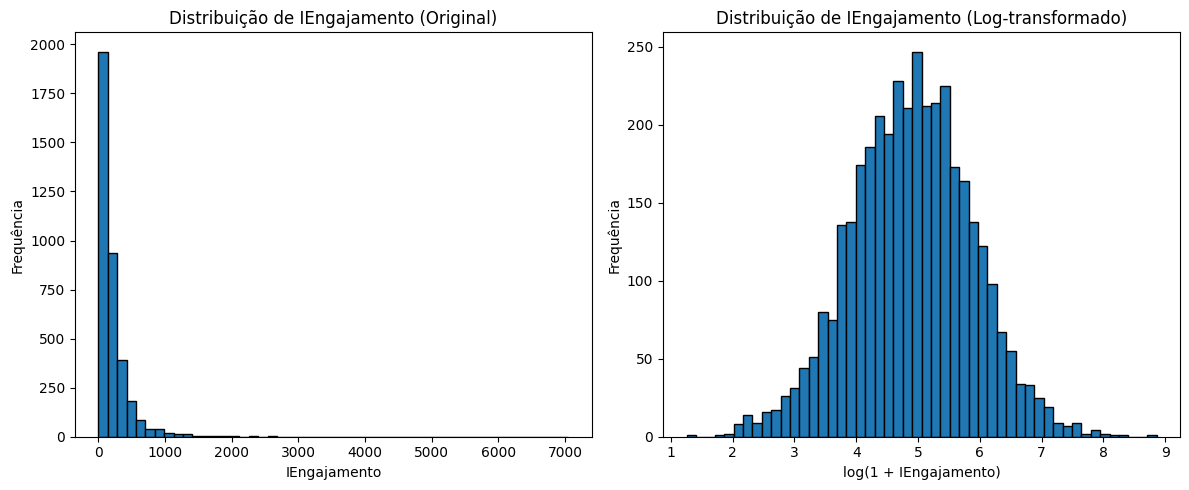

In [44]:
import matplotlib.pyplot as plt

# Plotar os histogramas lado a lado
plt.figure(figsize=(12,5))

# Histograma da variável original
plt.subplot(1, 2, 1)
plt.hist(df["IEngajamento"], bins=50, edgecolor="black")
plt.title("Distribuição de IEngajamento (Original)")
plt.xlabel("IEngajamento")
plt.ylabel("Frequência")

# Histograma da variável transformada
plt.subplot(1, 2, 2)
plt.hist(df["log_IEngajamento"], bins=50, edgecolor="black")
plt.title("Distribuição de IEngajamento (Log-transformado)")
plt.xlabel("log(1 + IEngajamento)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()